<a href="https://colab.research.google.com/github/p09323028/2020f_NTU_Econometrics_I/blob/main/Textbook/CH7_Hypothesis_Tests_and_Confidence_Intervals_in_Multiple_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 7: Hypothesis Tests and Confidence Intervals in Multiple Regression**
Author: Jinze Wu

Student Number: p09323028

前置作業:
- import 套件
- 載入資料
- 讀取資料

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!gdown --id '10Q4-t5L8KZjaxUqR8iGnmXx_lY9JYgSL' --output caschool.xlsx

Downloading...
From: https://drive.google.com/uc?id=10Q4-t5L8KZjaxUqR8iGnmXx_lY9JYgSL
To: /content/caschool.xlsx
100% 91.4k/91.4k [00:00<00:00, 34.3MB/s]


In [ ]:
caschool = pd.read_excel('caschool.xlsx')

**Decription of Data;**

dist_code -- district Code;

Read_scr  -- avg Reading Score;

Math_scr  -- avg Math Score;

County   --  county;

District -- District;

gr_span -- grade span of district;

enrl_tot -- total enrollment;

teachers -- number of teachers;

computer -- number of computers;

testscr -- avg test score (= (read_scr+math_scr)/2 );

comp_stu -- computers per student ( = computer/enrl_tot);

expn_stu -- expentitures per student;

str -- student teacher ration (teachers/enrl_tot);

el_pct -- percent of English Learners;

Meal_pct -- Percent qualifying for reduced-price lunch;

clw_pct -- Percent qualifying for CalWorks;

aving -- district average income (in $1000's);

## **7.1 Hypothesis Tests and Confidence Intervals for a Single Coefficient**

### Equation 7.5

$\widehat{TestScore} = 686.0 - 1.10 \times STR - 0.650 \times PctEL$

In [ ]:
reg_7_5 = smf.ols(formula='testscr~str+el_pct', data=caschool)
results_7_5 = reg_7_5.fit(cov_type='HC1')  # robust
print(results_7_5.summary())

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     223.8
Date:                Fri, 09 Apr 2021   Prob (F-statistic):           9.28e-67
Time:                        05:44:22   Log-Likelihood:                -1716.6
No. Observations:                 420   AIC:                             3439.
Df Residuals:                     417   BIC:                             3451.
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    686.0322      8.728     78.599      0.0

### Equation 7.6

$\widehat{TestScore} = 64.96 - 0.29 \times STR + 3.87 \times Expn - 0.656 \times PctEL$

In [ ]:
caschool.expn_stu = caschool.expn_stu / 1000

In [ ]:
reg_7_6 = smf.ols(formula='testscr~str+expn_stu+el_pct', data=caschool)
results_7_6 = reg_7_6.fit(cov_type='HC1')  # robust
print(results_7_6.summary())

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     147.2
Date:                Fri, 09 Apr 2021   Prob (F-statistic):           5.20e-65
Time:                        05:44:22   Log-Likelihood:                -1712.8
No. Observations:                 420   AIC:                             3434.
Df Residuals:                     416   BIC:                             3450.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    649.5779     15.458     42.021      0.0

In [ ]:
# Covariance Matrix
np.set_printoptions(suppress=True)
results_7_6.cov_HC1.round(4)

array([[238.9604,  -6.6649, -20.7035,   0.0818],
       [ -6.6649,   0.2324,   0.4003,  -0.0024],
       [-20.7035,   0.4003,   2.4987,  -0.0102],
       [  0.0818,  -0.0024,  -0.0102,   0.001 ]])

In [ ]:
# Test (str = 0) and (expn_stu = 0)
print(results_7_6.f_test(['str=0','expn_stu=0']))

<F test: F=array([[5.43372705]]), p=0.004682304362881939, df_denom=416, df_num=2>


## **7.2 Tests of Joint Hypotheses**

### Equation 7.15

$\widehat{TestScore} = 664.7 - 0.671 \times PctEL, R^2 = 0.4149$

In [ ]:
reg_7_15 = smf.ols(formula='testscr~el_pct', data=caschool)
results_7_15 = reg_7_15.fit(cov_type='HC1')  # robust
print(results_7_15.summary())

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     436.6
Date:                Fri, 09 Apr 2021   Prob (F-statistic):           6.69e-67
Time:                        05:44:22   Log-Likelihood:                -1720.7
No. Observations:                 420   AIC:                             3445.
Df Residuals:                     418   BIC:                             3454.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    664.7394      0.974    682.458      0.0

In [ ]:
# Correlations reported in text
caschool[['testscr','str','expn_stu','el_pct','meal_pct','calw_pct']].corr()

,testscr,str,expn_stu,el_pct,meal_pct,calw_pct
testscr,1.000000,-0.226363,0.191273,-0.644124,-0.868772,-0.626853
str,-0.226363,1.000000,-0.619982,0.187642,0.135203,0.018276
expn_stu,0.191273,-0.619982,1.000000,-0.071396,-0.061039,0.067889
el_pct,-0.644124,0.187642,-0.071396,1.000000,0.653061,0.319576
meal_pct,-0.868772,0.135203,-0.061039,0.653061,1.000000,0.739422
calw_pct,-0.626853,0.018276,0.067889,0.319576,0.739422,1.000000


## **7.3 Testing Single Restrictions Involving Multiple Coefficients**

## **7.4 Confidence Sets for Multiple Coefficientsn**

## **7.5 Model Specification for Multiple Regression**

## **7.6 Analysis of the Test Score Data Set**

### FIGURE 7.2

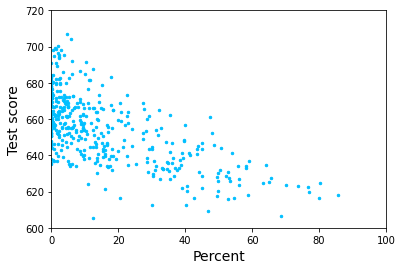

In [ ]:
plt.scatter(caschool.el_pct, caschool.testscr, color='deepskyblue', s=6)
plt.xlim(0, 100)
plt.ylim(600, 720)
plt.xlabel('Percent', size=14)
plt.ylabel('Test score', size=14)
plt.show()

### Table 7.1

In [ ]:
# Column (1)
reg_7_1_1 = smf.ols(formula='testscr~str', data=caschool)
results_7_1_1 = reg_7_1_1.fit(cov_type='HC1')  # robust
print(results_7_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     19.26
Date:                Fri, 09 Apr 2021   Prob (F-statistic):           1.45e-05
Time:                        05:44:23   Log-Likelihood:                -1822.2
No. Observations:                 420   AIC:                             3648.
Df Residuals:                     418   BIC:                             3657.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    698.9330     10.364     67.436      0.0

In [ ]:
# Column (2)
reg_7_1_2 = smf.ols(formula='testscr~str+el_pct', data=caschool)
results_7_1_2 = reg_7_1_2.fit(cov_type='HC1')  # robust
print(results_7_1_2.summary())

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     223.8
Date:                Fri, 09 Apr 2021   Prob (F-statistic):           9.28e-67
Time:                        05:44:23   Log-Likelihood:                -1716.6
No. Observations:                 420   AIC:                             3439.
Df Residuals:                     417   BIC:                             3451.
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    686.0322      8.728     78.599      0.0

In [ ]:
# Column (3)
reg_7_1_3 = smf.ols(formula='testscr~str+el_pct+meal_pct', data=caschool)
results_7_1_3 = reg_7_1_3.fit(cov_type='HC1')  # robust
print(results_7_1_3.summary())

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     453.5
Date:                Fri, 09 Apr 2021   Prob (F-statistic):          1.05e-130
Time:                        05:44:42   Log-Likelihood:                -1520.5
No. Observations:                 420   AIC:                             3049.
Df Residuals:                     416   BIC:                             3065.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    700.1500      5.568    125.735      0.0

In [ ]:
# Column (4)
reg_7_1_4 = smf.ols(formula='testscr~str+el_pct+calw_pct', data=caschool)
results_7_1_4 = reg_7_1_4.fit(cov_type='HC1')  # robust
print(results_7_1_4.summary())

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     170.4
Date:                Fri, 09 Apr 2021   Prob (F-statistic):           4.93e-72
Time:                        05:45:23   Log-Likelihood:                -1625.3
No. Observations:                 420   AIC:                             3259.
Df Residuals:                     416   BIC:                             3275.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    697.9987      6.920    100.861      0.0

In [ ]:
# Column (5)
reg_7_1_5 = smf.ols(formula='testscr~str+el_pct+meal_pct+calw_pct', data=caschool)
results_7_1_5 = reg_7_1_5.fit(cov_type='HC1')  # robust
print(results_7_1_5.summary())

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     361.7
Date:                Fri, 09 Apr 2021   Prob (F-statistic):          8.86e-134
Time:                        05:45:51   Log-Likelihood:                -1520.2
No. Observations:                 420   AIC:                             3050.
Df Residuals:                     415   BIC:                             3071.
Df Model:                           4                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    700.3918      5.537    126.483      0.0